# Introduction
We are working with a dataset that contains information about Airbnb listings in the US. Our goal is to predict the price of a stay in these listings. The dataset consists of 74411 listings and 29 columns. One of the columns, log_price, is the target variable that we are trying to predict

<font color = 'yellow'>
Content: 

1. [Load and Check Data](#1)
1. [Variable Description](#2)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Missing Value](#7)
    * [Find Missing Value](#8)
    * [Fill Missing Value](#9)
    
1. [ Outlier Detection](#10)

1. [Visualization](#11)
    * [Correlation Between log_price--accommodates--bathrooms--number_of_reviews--review_scores_rating--bedroom--beds](#12)
    * [accommodates -- log_price](#13)
    * [bathrooms -- log_price](#14)
    * [number_of_reviews -- log_price](#15)
    * [review_scores_rating -- log_price](#16)
    * [bedroom -- log_price](#17)
    * [beds -- log_price](#18)
    
1. [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)
1. [Modeling](#29)
    * [Train - Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32) 
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns
import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:\Users\qwert\AppData\Local\Temp\ipykernel_1696\3811642128.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


1. <a id = "1"></a><br>
# Load and Check Data

In [2]:
cwd = os.getcwd()  # your current working directory (cwd)
files = os.listdir(cwd)  # This will Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\qwert\\OneDrive\\Masaüstü\\DATA SCIENCE\\PROJECTS\\PROJECT- FINAL\\ML_Project_Group_B': ['.git', 'Column_description.xlsx', 'Feature_Engineering.ipynb', 'Main.ipynb', 'Missing_Values.ipynb', 'modelling.ipynb', 'Outliers.ipynb', 'README.md', 'train.csv', 'Visualization.ipynb', 'zipcode_LA_DC_NY.csv', 'zipcode_usa.csv']


In [3]:
df = pd.read_csv('train.csv')

2. <a id = "2"></a><br>
# Variable Description


1. Id: It can be considered as a transaction registration number.

2. log_price: Price per night for rental. (TARGET)

3. property_type: Type of property to be rented.('Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel''Castle' 'Cabin' 'Treehouse'...)

4. room_type: The type of room to be rented. ('Entire home/apt' 'Private room' 'Shared room')

5. amenities: The essential items a guest expects to have a comfortable stay.("Wireless Internet","Air conditioning",Kitchen,"Free parking on premises","Smoke detector","Carbon monoxide detector","First aid kit","Safety card"...)

6. accommodates: Number of guests the rental can host. 

7. bathrooms:The number of bathroom found in the accommodation

8. bed_type: The type of bed found in the accommodation.(Real Bed, Futon, Pull-out Sofa, Couch, Airbed) 

9. cancellation_policy: Determines the amount of refund a guest will receive if they cancel their reservation. (strict, moderate, flexible, super_strict_30, super_strict_60)

10. cleaning_fee: Fee for cleaning the area you are staying in. (True, False)

11. city: Cities where the facility is located.(NYC, SF, DC, LA, Chicago, Boston)  

12. description: Detailed description of the space, usually including the room's features, amenities, location, and any special considerations or rules guests should be aware of.

13. first_review: Date of first feedback a guest leaves after staying at a particular property.

14. host_has_profile_pic: Whether the host has a profile picture (True, False)

15. host_identity_verified: Whether the host's identity has been confirmed. (True, False)

16. host_response_rate: Percentage of replies to host messages within a given time frame.

17. host_since: The date a host joined Airbnb and started using their property on the platform.

18. instant_bookable: Allows guests to book listings without having to wait for host's approval. (True, False)

19. last_review: The date when a guest last left feedback about their stay at that property.

20. latitude: Latitude value of the location of the facility.

21. longitude: Longtitude value of the location of the facility.

22. name: A descriptive or catchy headline that hosts use to attract guests.

23. neighbourhood: The specific district or district in which a property is located.

24. number_of_reviews: Represents the total number of reviews posted by guests staying at the property.

25. review_scores_rating: Value that represents the overall rating or evaluation given by guests to a host or accommodation. 

26. thumbnail_url: A web link address that points to a thumbnail image of a record.

27. zipcode: Zip code of the place where the accommodation is located

28. bedrooms: The number of separate bedrooms available to guests.

29. beds: The number of beds included in the rental

3. <a id = "3"></a><br>
# Basic Data Analysis


In [10]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [11]:
#pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [12]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [13]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [14]:
# Check Unique, Missing and Duplicated values

summary = pd.DataFrame(index=df.columns)
summary["Unique"] = df.nunique().values
summary["Duplicated"] = df.duplicated().sum()
summary["Missing"] = df.isnull().sum()
summary["Missing Percentage"] = (df.isnull().sum() / len(df)) * 100
summary["Types"] = df.dtypes
summary_styled = summary.style.background_gradient()
    
summary_styled

,Unique,Duplicated,Missing,Missing Percentage,Types
id,74111,0,0,0.000000,int64
log_price,767,0,0,0.000000,float64
property_type,35,0,0,0.000000,object
room_type,3,0,0,0.000000,object
amenities,67122,0,0,0.000000,object
accommodates,16,0,0,0.000000,int64
bathrooms,17,0,200,0.269865,float64
bed_type,5,0,0,0.000000,object
cancellation_policy,5,0,0,0.000000,object
cleaning_fee,2,0,0,0.000000,bool


* [Categorical Variable](#4)

In [15]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_columns

['property_type',
 'room_type',
 'amenities',
 'bed_type',
 'cancellation_policy',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

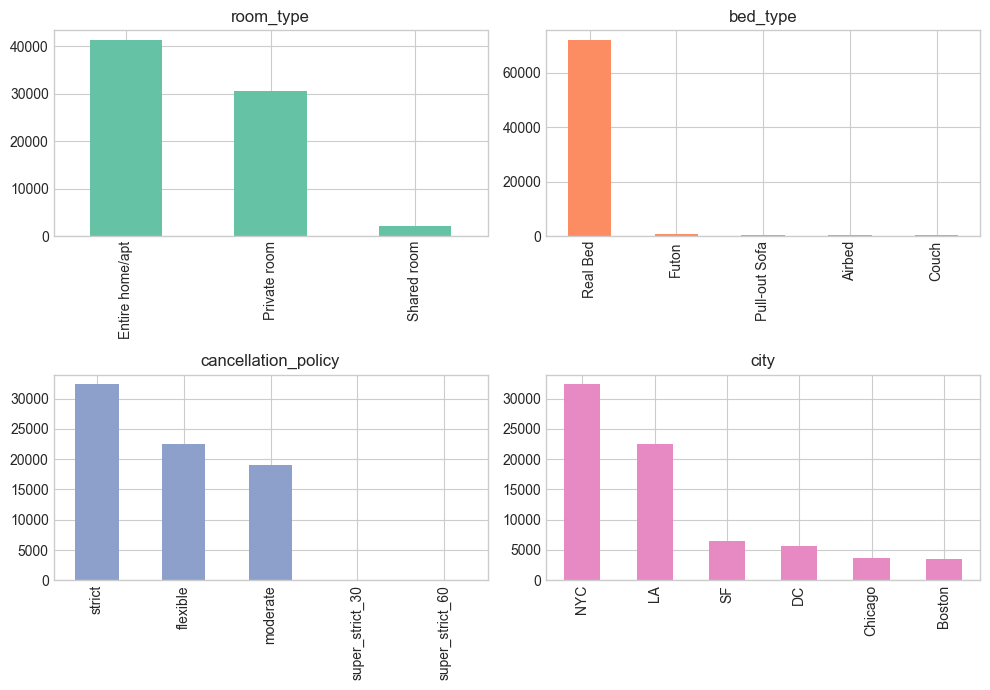

In [4]:
plt.figure(figsize=(10, 7))

columns = ['room_type', 'bed_type', 'cancellation_policy', 'city']
colors = sns.color_palette('Set2', len(columns)) 

for i, column in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    df[column].value_counts().plot(kind='bar', title=column, color=colors[i])
    plt.xlabel('')

plt.tight_layout()
plt.show()

* [Numerical Variable](#5)

In [17]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

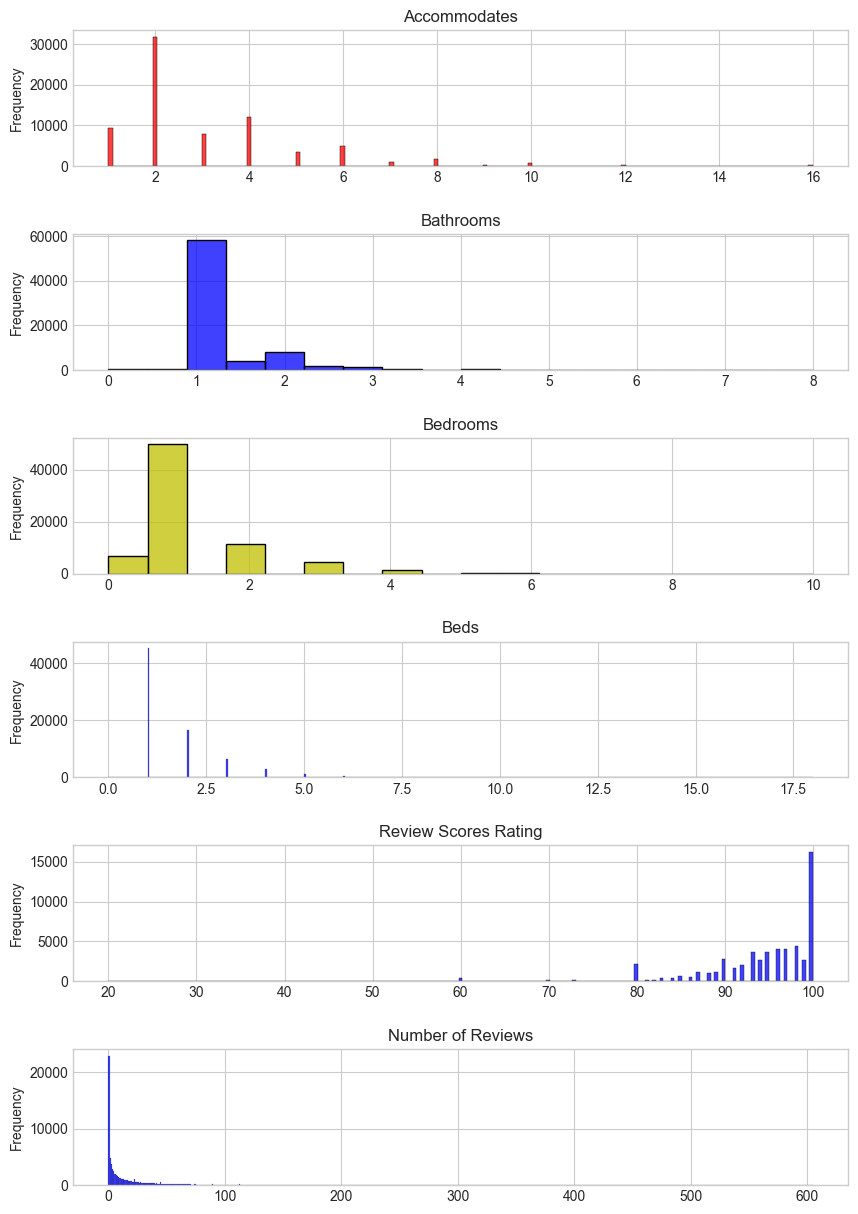

In [18]:
fig, ax = plt.subplots(6, 1, figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)

columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']
colors = ['r', 'b', 'y', 'b', 'b', 'b']
titles = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Review Scores Rating', 'Number of Reviews']

for i in range(len(columns)):
    sns.histplot(df[columns[i]], color=colors[i], ax=ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frequency')

plt.show()

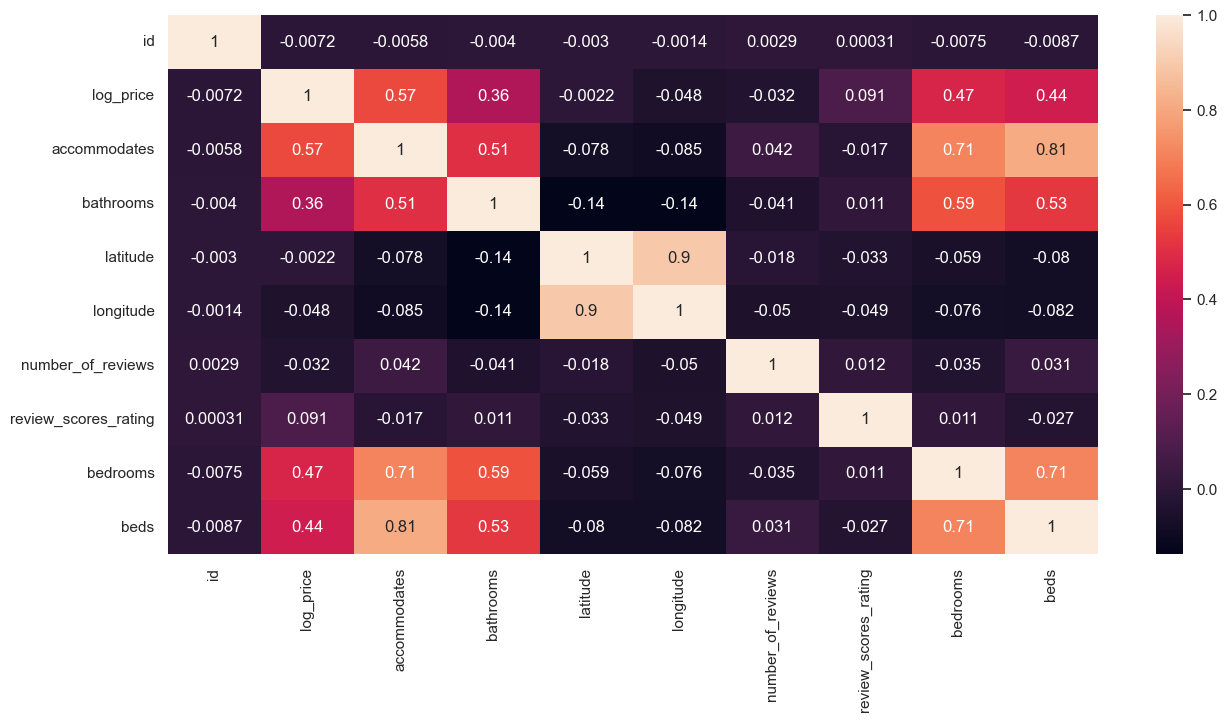

In [19]:
# Correlation of numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float'])
sns.set(font_scale=1.0)
plt.figure(figsize=(15,7))
sns.heatmap(numerical_columns.corr(), annot=True)
plt.show()

* DATA CLEANING 

In [22]:
df['amenities']=df['amenities'].replace(r'["]', '', regex=True)
df['name'] = df['name'].apply(lambda x: re.sub(r"[\*\-]|(\s*#\d+)", "", x))

4. <a id = "4"></a><br>
# Missing Value

<AxesSubplot:>

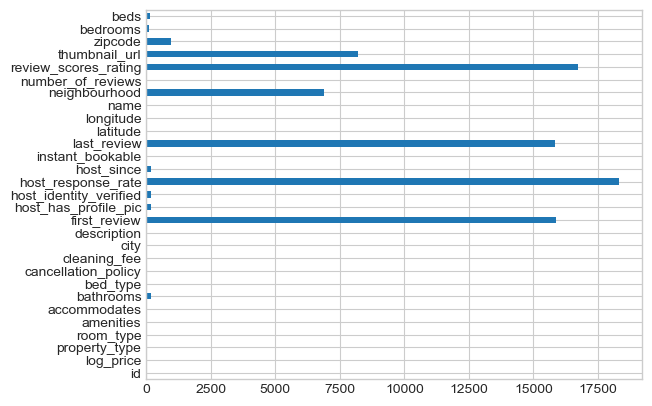

In [ ]:

df.isnull().sum().plot.barh()

* number_of_reviews

!!!  0 olma durumu incelenmeli,belki yeni bir ev olabilir

In [ ]:
df['number_of_reviews'].isnull().sum()

0

* bedrooms

In [ ]:
df['bedrooms'].unique()

array([ 1.,  3.,  2.,  0.,  4., nan,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
df['bedrooms'].value_counts()

bedrooms
1.0     49784
2.0     11351
0.0     6715 
3.0     4309 
4.0     1330 
5.0     355  
6.0     106  
7.0     38   
8.0     14   
10.0    10   
9.0     8    
Name: count, dtype: int64

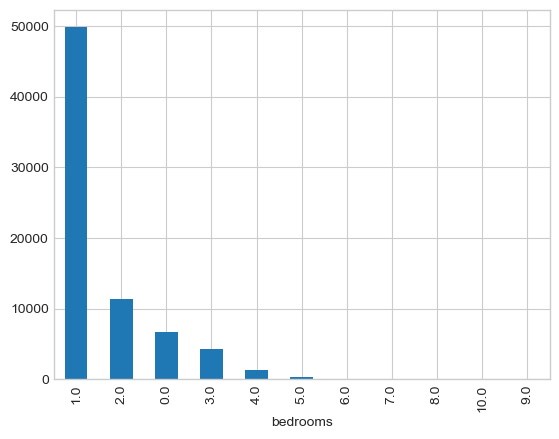

In [ ]:
df['bedrooms'].value_counts().sort_values(ascending=False).plot(kind='bar');

In [ ]:
df['bedrooms'].isnull().sum()

91

In [15]:
#description sutununda bedroom gecenler
filtered_data = df[(df['description'].str.contains('one bedroom|bedroom|two bedrooms|bedrooms', na=False)) & (df['bedrooms'].isna())]
print(filtered_data)
num_rows = len(filtered_data)
print("Filtrelenmiş veri setindeki gözlem sayısı:", num_rows)

             id  log_price property_type        room_type   
2842   12130093   4.382027     Apartment  Entire home/apt  \
19579  12674680   5.293305     Apartment  Entire home/apt   
36416  10230060   4.553877     Apartment  Entire home/apt   
51751   7483951   4.174387         House  Entire home/apt   
56921  18445388   4.787492     Apartment     Private room   
57038  12207073   4.595120     Apartment  Entire home/apt   
58811   7275122   5.476464     Apartment  Entire home/apt   
72355    206772   5.298317     Apartment  Entire home/apt   

                                               amenities  accommodates   
2842   {TV,Internet,Wireless Internet,Air conditionin...             2  \
19579  {TV,Wireless Internet,Air conditioning,Kitchen...             2   
36416  {Wireless Internet,Air conditioning,Kitchen,Br...             2   
51751  {TV,Cable TV,Internet,Wireless Internet,Kitche...             2   
56921  {TV,Wireless Internet,Air conditioning,Kitchen...             1   
57038 

In [16]:
#descriptiondan bulunan degerleri 1 ile doludurma
ids = [12130093, 12674680, 10230060, 7483951, 18445388, 12207073, 7275122, 206772]
df.loc[df['id'].isin(ids), 'bedrooms'] = df.loc[df['id'].isin(ids), 'bedrooms'].fillna(1)

In [17]:
df['bedrooms'].isnull().sum()

83

In [ ]:
#df["bedrooms"] = df['bedrooms'].fillna((df["bedrooms"].mean()))

* thumbnail_url

In [ ]:
df['thumbnail_url'].value_counts()

thumbnail_url
https://a0.muscache.com/im/pictures/70087089/bc66229a_original.jpg?aki_policy=small              3
https://a0.muscache.com/im/pictures/23033013/54d62516_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/104667326/a7a2b145_original.jpg?aki_policy=small             2
https://a0.muscache.com/im/pictures/95059281/d8bfc436_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/4491e5c5-33f6-4704-9887-76a059f86fda.jpg?aki_policy=small    2
                                                                                                ..
https://a0.muscache.com/im/pictures/111150220/7099e1de_original.jpg?aki_policy=small             1
https://a0.muscache.com/im/pictures/bfc6695c-93f9-4a90-a6d8-9f6c038fff28.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/99319739/70c4beaf_original.jpg?aki_policy=small              1
https://a0.muscache.com/im/pictures/3897544/bed318ce_original.jpg?aki_policy=small             

ayni resmi kullaan evler var!

In [19]:
degerler = df['thumbnail_url'].value_counts()
tekrar_edenler = degerler[degerler > 1].index.tolist()
print(tekrar_edenler)
sayisi = len(tekrar_edenler)
print("Birden fazla tekrar eden değerlerin sayısı:", sayisi)

['https://a0.muscache.com/im/pictures/70087089/bc66229a_original.jpg?aki_policy=small', 'https://a0.muscache.com/im/pictures/23033013/54d62516_original.jpg?aki_policy=small', 'https://a0.muscache.com/im/pictures/104667326/a7a2b145_original.jpg?aki_policy=small', 'https://a0.muscache.com/im/pictures/95059281/d8bfc436_original.jpg?aki_policy=small', 'https://a0.muscache.com/im/pictures/4491e5c5-33f6-4704-9887-76a059f86fda.jpg?aki_policy=small', 'https://a0.muscache.com/im/pictures/623a5884-0613-4cbd-962f-bbd28c7f47bc.jpg?aki_policy=small', 'https://a0.muscache.com/im/pictures/109405834/9a555e66_original.jpg?aki_policy=small', 'https://a0.muscache.com/im/pictures/28563531/1000de61_original.jpg?aki_policy=small', 'https://a0.muscache.com/im/pictures/61042471/5543b0e0_original.jpg?aki_policy=small', 'https://a0.muscache.com/im/pictures/39dc7b1a-15ca-4820-ac7d-44325007f1a2.jpg?aki_policy=small', 'https://a0.muscache.com/im/pictures/105275678/2ec252ae_original.jpg?aki_policy=small']
Birden fa

In [ ]:
#df['thumbnail_url'] = df['thumbnail_url'].apply(lambda x: 1 if pd.notnull(x) else 0)
#bu sutunda veri olanlari 1 olmayanlari 0 a dönusturme

In [18]:
df['thumbnail_url'].isnull().sum()

8216

In [ ]:
   # making new feature "is_thumbnail_exist"
df['is_thumbnail_exist']= df.thumbnail_url.fillna(0).apply(lambda x: False if x == 0 else True)
df.head()

* 'host_since', 'host_has_profile_pic', 'host_identity_verified'

In [ ]:
#Missing 188 values of 3 specified columns in the same row. We predicted that there is a threshold due to incorrectly opened or incomplete records.
df.dropna(subset=['host_since', 'host_has_profile_pic', 'host_identity_verified'], inplace=True)

* bathrooms
        

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nan_rows = df[df['bathrooms'].isna()]
print(nan_rows)

In [ ]:
#Filter rows containing 'one bathroom' or 'two bathrooms' in the 'description' column
filtered_bath = df[(df['description'].str.contains('one bathroom| two bathrooms |1 bathroom | 2 bathrooms | 3 bathrooms | 4 bathrooms | 1', na=False)) & (df['bathrooms'].isna())]
print(filtered_bath)

             id  log_price property_type     room_type   
9008   18586142   4.442651     Apartment  Private room  \
69923  15390808   5.010635     Apartment  Private room   

                                               amenities  accommodates   
9008   {"Wireless Internet",Kitchen,Heating,Hangers,"...             1  \
69923  {TV,"Cable TV",Kitchen,"Pets live on this prop...             1   

       bathrooms  bed_type cancellation_policy  cleaning_fee city   
9008         NaN  Real Bed              strict          True  NYC  \
69923        NaN  Real Bed            flexible         False   LA   

                                             description first_review   
9008   One private bedroom:  double, side table, lamp...   2013-07-22  \
69923  I have an extra sunny remodeled bedroom for re...          NaN   

      host_has_profile_pic host_identity_verified host_response_rate   
9008                     t                      t                97%  \
69923                    t    

In [ ]:
filtered_bath = df[(df['description'].str.contains('bathroom', na=False)) & (df['bathrooms'].isna())]
filtered_bath[['description','bathrooms']].head(10)

             id  log_price    property_type        room_type   
38     12232154   4.744932        Apartment  Entire home/apt  \
2355   19639906   3.912023            House     Private room   
2842   12130093   4.382027        Apartment  Entire home/apt   
3150    4280150   4.605170            House     Private room   
5234    1641060   5.883322        Apartment  Entire home/apt   
5771   10594745   4.234107  Bed & Breakfast     Private room   
6353   16416743   3.871201            House     Private room   
6441   21119264   5.010635        Apartment  Entire home/apt   
8537    6249284   5.298317        Apartment     Private room   
9008   18586142   4.442651        Apartment     Private room   
10110   2318184   4.094345            House     Private room   
10954  17387395   4.007333        Apartment     Private room   
11727  13496609   4.248495            House     Private room   
12351  10943915   4.605170            House      Shared room   
12844   3116572   4.317488        Apartm

In [ ]:
import re

# Search for texts in the Description column and find matching patterns
pattern = r'(\w+)\s+bathroom'
matches = filtered_bath['description'].str.extract(pattern, flags=re.IGNORECASE)

#Add matching patterns as a new column
filtered_bath['pre_bathroom_word'] = matches

# Print the result
print(filtered_bath[['description','pre_bathroom_word']])

                                             description pre_bathroom_word
38     Available July 17 to July 30 Minimum 8 nights ...        attractive
2355   Private Room in Mid-City Los Angeles. Shared b...            Shared
2842   This is a very small  studio apartment with a ...               and
3150   Nice clean private room with bathroom and priv...              with
5234   Enter a modern world in harmony - where nature...          upgraded
5771   Full bed  SHARED bathroom  4th floor walk up B...            SHARED
6353   ABOUT THE ROOM: This is for a large private ro...            shared
6441   Our one bedroom is available right in the midd...             large
8537   Spacious room in an apartment overlooking the ...         dedicated
9008   One private bedroom:  double, side table, lamp...               one
10110  This cozy room is in a charming Spanish style ...                 a
10954  I have a single room that is very small and co...               the
11727  Private, large, fu

C:\Users\karakurt\AppData\Local\Temp\ipykernel_2972\2717930529.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bath['pre_bathroom_word'] = matches


In [ ]:
def convert_bathroom_description(description):
    #if ('one bathroom') or ('1 bathroom') or ('1full') or ('full') or ('shared') or ('Shared') or ('Private') or ('SHARED') or ('attractive') in description.lower():
    #    return 1
    if ("two bathrooms") or  ('2 bathrooms') in description.lower():
        return 2
    elif '3 bathrooms' in description.lower():
        return 3
    elif '4 bathrooms' in description.lower():
        return 4 
    else:
        return 1
        #return None

# Print the results from the "filtered_bath" DataFrame as numeric values in the "bathrooms" column
df.loc[filtered_bath.index, 'bathrooms'] = filtered_bath['description'].apply(convert_bathroom_description)

In [ ]:
df['bathrooms'].isnull().sum()

In [ ]:
# Filter rows with empty bathrooms column and property type apartment
filtered_bath = df[df['bathrooms'].isnull() & (df['property_type']=="Apartment")]

#Show equivalents in the property Type and room type columns
result = filtered_bath[['property_type', 'room_type']]
print(result)
print(len(result))

* first_review

In [ ]:
# Filters empty values in column 'host_since'
filtered_data = df[df['host_since'].isnull()]
#last review filters out empty values from the filtered values
filtered_data =  filtered_data[filtered_data['last_review'].isnull()]
# Returns whether the values in the selected properties are empty after 2 filters
selected_columns = filtered_data[['first_review', 'host_has_profile_pic', 'host_identity_verified']]
print(selected_columns)

      first_review host_has_profile_pic host_identity_verified
92             NaN                  NaN                    NaN
525            NaN                  NaN                    NaN
6878           NaN                  NaN                    NaN
9996           NaN                  NaN                    NaN
15288          NaN                  NaN                    NaN
16075          NaN                  NaN                    NaN
16949          NaN                  NaN                    NaN
18815          NaN                  NaN                    NaN
19171          NaN                  NaN                    NaN
19629          NaN                  NaN                    NaN
20110          NaN                  NaN                    NaN
23109          NaN                  NaN                    NaN
23705          NaN                  NaN                    NaN
26325          NaN                  NaN                    NaN
35323          NaN                  NaN                

In [ ]:
#As a result of filtering, we drop these rows because the same row is empty in 9 properties.
df = df.drop(filtered_data.index)

In [ ]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15828
host_has_profile_pic        152
host_identity_verified      152
host_response_rate        18263
host_since                  152
instant_bookable              0
last_review               15791
latitude                      0
longitude                     0
name                          0
neighbourhood              6871
number_of_reviews             0
review_scores_rating      16686
thumbnail_url              8212
zipcode                     987
bedrooms                     91
beds                        131
city-neigh                 6871
dtype: int64

* zipcode

In [ ]:
df['zipcode'] = pd.to_numeric(df['zipcode'],errors='coerce')

In [ ]:
correlation = df['log_price'].corr(df['zipcode'])
print("Correlation:", correlation)

Correlation: 0.03402257978807774


In [ ]:
#pip install uszipcode    # installing Library to find zip code from latitude and longitude information using us zip code
from uszipcode import SearchEngine

search = SearchEngine()
zipcodes = []
for index, row in df.iterrows():
    latitude = row['latitude']  # Latitude 
    longitude = row['longitude']  # Longitude 

    result = search.by_coordinates(latitude, longitude)
    if result:
        zipcode = result[0].zipcode
        zipcodes.append(zipcode)
    else:
        zipcodes.append(None)  # None if postal code not found or incorrect

df['Zipcode'] = zipcodes  # Adds a new Zipcode column

In [ ]:
df[['Zipcode','zipcode']].head(40)   #comparing two columns for first observation

,Zipcode,zipcode
0,11201,11201.0
1,10019,10019.0
2,10037,10027.0
3,94115,94117.0
4,20010,20009.0
5,94114,94131.0
6,90292,90292.0
7,90017,90015.0
8,94121,94121.0
9,91748,91748.0


In [ ]:
df['Zipcode'].isnull().sum()

In [ ]:
filtered_zip =df[df['Zipcode'].isna()][['neighbourhood','city','latitude','zipcode']]
print(filtered_zip)

* Neighbourhood

In [ ]:
from uszipcode import SearchEngine
from geopy.geocoders import Nominatim
# taking zipcodes
zipcodes = df['Zipcode']
#print(zipcodes)

In [ ]:


# Nominatim geocoder'ı başlatın
geolocator = Nominatim(user_agent='my_app')

# Zip kodlarına göre mahalleleri alın
neighbourhoods = []
for zipcode in zipcodes:
    try:
        location = geolocator.geocode(zipcode)
        neighbourhood = location.raw['address'].get('neighbourhood', 'Unknown')
        neighbourhoods.append(neighbourhood)
    except Exception as e:
        print(f"Hata: {e} - Zip kodu: {zipcode}")

# "neighbourhood" sütununu oluşturun
df['neighbourhoods'] = neighbourhoods

# Sonucu yazdırın
print(df[['neighbourhoods', 'neighbourhood']])

In [ ]:
# SearchEngine'i başlatın
search = SearchEngine

# Zip kodlarına göre mahalleleri alın
neighbourhoods = []
for zipcode in zipcodes:
    try:
        result = search.by_zipcode(zipcode)
        neighbourhood = result.major_city if result.major_city else "Unknown"
        neighbourhoods.append(neighbourhood)
    except Exception as e:
        print(f"Hata: {e} - Zip kodu: {zipcode}")

In [ ]:
df['neighbourhoods'] = neighbourhoods

In [ ]:

print(df[['neighbourhood', 'neighbourhoods']])


In [ ]:
#MAhallelerin bulunduğu şehir için yeni bir sütun oluşturdum. neıghbourhood yerine kullanılabilir.

df['city-neigh'] = df['city'] + '-' + df['neighbourhood']
df['city-neigh'].value_counts()

city-neigh
NYC-Williamsburg                          2862
NYC-Bedford-Stuyvesant                    2166
NYC-Bushwick                              1601
NYC-Upper West Side                       1396
LA-Mid-Wilshire                           1392
NYC-Harlem                                1374
LA-Hollywood                              1321
NYC-Hell's Kitchen                        1299
LA-Venice                                 1222
NYC-Upper East Side                       1206
NYC-Crown Heights                         1076
NYC-Astoria                                898
NYC-Lower East Side                        833
NYC-East Village                           814
NYC-East Harlem                            793
SF-Mission District                        784
LA-West Hollywood                          729
NYC-Chelsea                                726
NYC-Greenpoint                             725
NYC-Washington Heights                     721
NYC-Hamilton Heights                       628
NY

* host_response_rate

In [ ]:
#grafiği sor
df.host_response_rate = df.host_response_rate.apply(lambda x: int(x[:len(x)-1])/100 if isinstance(x,str) else x )
df.host_response_rate = df.host_response_rate.fillna(df.host_response_rate.mean())

* last_review

In [ ]:
#first ewview ile kontrol
nan_rows = df[df['first_review'].isnull()]
nan_last_review_count = np.sum(nan_rows['last_review'].isnull())
nan_last_review_count
# We detected that the values that are Nan in the last review are Nan in the first review values.

In [ ]:
df.last_review.fillna(method="ffill",inplace=True)

* review_scores_rating

In [ ]:
# The "number_of_reviews" column values are directly related to the values in the "review_scores_rating" column
filtered_data = df[["number_of_reviews","review_scores_rating"]][df.number_of_reviews == 0]
filtered_data

In [ ]:
# We compared the Nan-valued rows of the "review_scores_rating" column with the 0 values of the "number_of_reviews" column. 
# If the value is 0, we set the Nan value to 0.
zero_reviews_nan_scores = df[(df['number_of_reviews'] == 0) & (df['review_scores_rating'].isnull())]
df.loc[zero_reviews_nan_scores.index, 'review_scores_rating'] = 0

In [ ]:
#filled the remaining missing values with the mean
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)

* beds

In [ ]:
#The number of beds is directly related to the bedroom and bed_type column.
result = df.loc[df['beds'].isnull(), 'bed_type'].value_counts() # boş olan beds değerlerinin, bed_type değerleri
result

In [ ]:
## the values of the empty beds, the bedrooms values
result = df.loc[df['beds'].isnull(), 'bedrooms'].value_counts()
result 

In [ ]:
# We filled the empty beds with 1, those whose bedroms value is empty and 1, and those whose bed_type value is Real Bed. 
# We completed the remaining empty values with the value of bedrooms.
df.loc[((df['beds'].isnull()) | (df['beds'] == 0)) & (df['bedrooms'] == 1) & (df['bed_type'] == 'Real Bed'), 'beds'] = 1
df.loc[df['beds'].isnull(), 'beds'] = df['bedrooms']

4. <a id = "4"></a><br>
# Outlier Detection

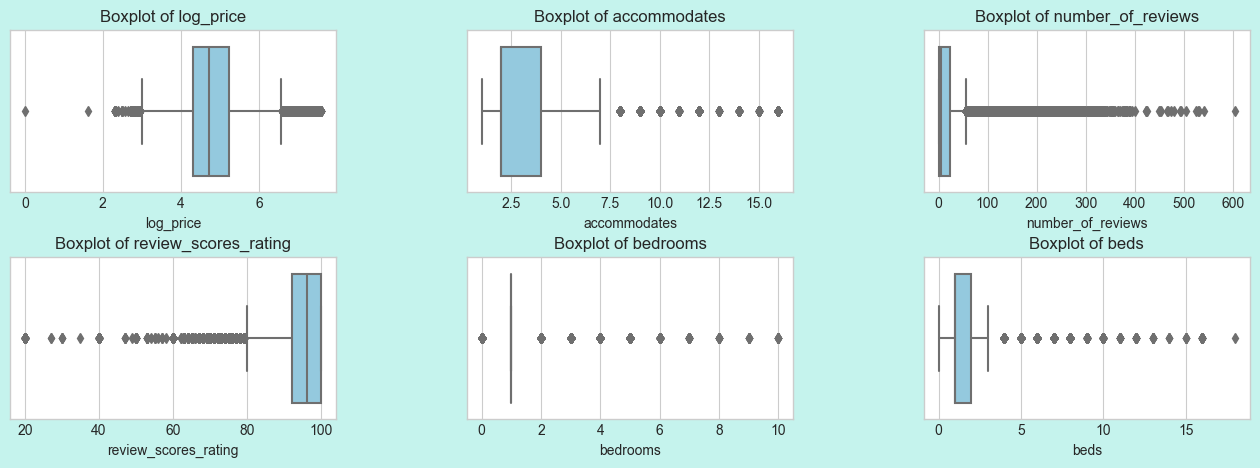

In [4]:
# Columns where we want to find outliers
outliers_columns = ['log_price', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

fig = plt.figure(facecolor='#C5F3ED', figsize=(16, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Let's loop the columns and draw the boxplot
for num, column_name in enumerate(outliers_columns, start=1):
    ax = fig.add_subplot(3, 3, num)
    sns.boxplot(x=df[column_name], color='skyblue', ax=ax)
    ax.set_title(f"Boxplot of {column_name}")

plt.show()

In [5]:
def find_column_outliers(df, column_name):
    column = df[column_name]
    Q1 = np.quantile(column, 0.25)
    Q3 = np.quantile(column, 0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    outliers = column[(column < lower_limit) | (column > upper_limit)]
    return outliers

for column_name in outliers_columns:
    outliers = find_column_outliers(df, column_name)
    print(f"Outliers in '{column_name}':")
    print(outliers)
    print("===")

Outliers in 'log_price':
3        6.620073
24       6.956545
52       6.620073
62       6.907755
148      7.150701
           ...   
73939    6.731018
73953    6.829794
73957    6.684612
74031    6.907755
74081    6.907755
Name: log_price, Length: 1532, dtype: float64
===
Outliers in 'accommodates':
19        8
42        8
62        9
104       9
109       9
         ..
74031     8
74032    10
74042     8
74081    16
74102    10
Name: accommodates, Length: 3604, dtype: int64
===
Outliers in 'number_of_reviews':
8        159
10        82
21        57
22        73
32       248
        ... 
74037    158
74057     89
74082     60
74098    177
74110    205
Name: number_of_reviews, Length: 8203, dtype: int64
===
Outliers in 'review_scores_rating':
Series([], Name: review_scores_rating, dtype: float64)
===
Outliers in 'bedrooms':
Series([], Name: bedrooms, dtype: float64)
===
Outliers in 'beds':
Series([], Name: beds, dtype: float64)
===


We tried the IQR (Interquartile Range) Method, Winsorizing Method, Robust Scaling and Capping and Flooring methods, which are the methods of processing outliers on our data. We chose the most suitable IQR (Interquartile Range) Method to better analyze our data.

In [9]:
# Let's set the lower and upper percentiles to handle outliers
lower_limit = 0.05
upper_limit = 0.95

outliers_columns = ['log_price', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

def handle_outliers(df, column_name, lower_limit, upper_limit):
    column = df[column_name]
    Q1 = column.quantile(lower_limit)
    Q3 = column.quantile(upper_limit)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df[column_name] = np.clip(df[column_name], lower_bound, upper_bound)

# Deal with outliers
for column_name in outliers_columns:
    handle_outliers(df, column_name, lower_limit, upper_limit)

# show the updated dataframe
print(df)

             id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Ai

accommodates

In [20]:
# IQR yöntemiyle outlier analizi yapma
q1 = df['accommodates'].quantile(0.25)  # Alt çeyrek
q3 = df['accommodates'].quantile(0.75)  # Üst çeyrek
iqr = q3 - q1  # IQR (Interquartile Range)
lower_bound = q1 - 1.5 * iqr  # Alt sınıra eşik değeri uygulanması
upper_bound = q3 + 1.5 * iqr  # Üst sınıra eşik değeri uygulanması

outliers = df[(df['accommodates'] < lower_bound) | (df['accommodates'] > upper_bound)]
print("Aykırı Değerler:")
print(outliers)




Aykırı Değerler:
             id  log_price property_type        room_type   
19     18224863   4.595120         House  Entire home/apt  \
42     12428036   4.317488     Apartment     Private room   
62     11712092   6.907755         House  Entire home/apt   
104    14900814   6.171701         House  Entire home/apt   
109      235281   5.293305     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74031    189787   6.907755         Villa  Entire home/apt   
74032  16659768   5.616771         House  Entire home/apt   
74042  16274884   5.703782         House  Entire home/apt   
74081  13996915   6.907755         Other  Entire home/apt   
74102   7935934   4.110874         Villa      Shared room   

                                               amenities  accommodates   
19     {TV,Wireless Internet,Air conditioning,Kitchen...             8  \
42     {Internet,Wireless Internet,Kitchen,Free parki...             8   
62     {TV,Internet,Wireless

bedrooms    &     beds

In [23]:
pd.set_option('display.max_rows', None)  # Tüm satırları göstermek için
pd.set_option('display.max_columns', None)
outliers_values = outliers[['accommodates','bedrooms', 'beds']]

print("accommadates sutunundaki Aykırı Değerlere Sahip Satırların bedrooms ve beds Değerleri:")
print(outliers_values)

accommadates sutunundaki Aykırı Değerlere Sahip Satırların bedrooms ve beds Değerleri:
       accommodates  bedrooms  beds
19                8       3.0   3.0
42                8       1.0   7.0
62                9       4.0   4.0
104               9       4.0   4.0
109               9       2.0   5.0
120               8       3.0   3.0
124              10       3.0   4.0
213               8       3.0   4.0
237               8       1.0   2.0
254              10       4.0   5.0
276              10       5.0   5.0
306              16       2.0   3.0
319               8       3.0   4.0
347               8       4.0   4.0
356               8       3.0   4.0
398               8       3.0   5.0
401               8       3.0   3.0
443              10       5.0   5.0
457              16       6.0  10.0
459               8       2.0   4.0
466               8       2.0   4.0
482              11       4.0   6.0
512               8       2.0   2.0
520               8       1.0   2.0
540          

In [25]:
# Bedroom sayısı 0 veya 1 olanları seçme
bedroom_01 = df[(df['bedrooms'] == 0) | (df['bedrooms'] == 1)]
#proprty_type i loft olanlari görelim
property_loft=df[(df['property_type'] == 'Loft') ]
# Bed sayısı 3'ten küçük veya esit olanları seçme
bed_3 = df[(df['beds'] < 3)|(df['beds'] == 3)]

# Tüm koşulları sağlayan satırları seçme
#filtered_accommadate = df[(df.index.isin(outliers.index)) & (df.index.isin(bedroom_01.index)) & (df.index.isin(bed_3.index))]
#filtered_accommadate = df[(df.index.isin(outliers.index)) & (df.index.isin(bedroom_01.index)) & (df.index.isin(bed_3.index))][['accommodates', 'bedrooms','bathrooms', 'property_type','beds']]
filtered_accommadate = df[(df.index.isin(outliers.index)) & (df.index.isin(bedroom_01.index)) & (df.index.isin(bed_3.index))& (df.index.isin(property_loft.index))][['accommodates','property_type','description']]
# Sonuçları görüntüleme
print("Aykırı Değerlere Sahip, Bedroom Sayısı 0 veya 1 Olan ve Bed Sayısı 3'ten Küçük Satırlar:")
print(filtered_accommadate)

print('------------------------')
count = len(filtered_accommadate)
print("Aykırı Değerlere Sahip, Bedroom Sayısı 0 veya 1 Olan property_typr i Loft ve Bed Sayısı 3'ten Küçük Satır Sayısı:", count)




Aykırı Değerlere Sahip, Bedroom Sayısı 0 veya 1 Olan ve Bed Sayısı 3'ten Küçük Satırlar:
       accommodates property_type   
569              16          Loft  \
768              12          Loft   
1998             16          Loft   
2599             16          Loft   
6339             10          Loft   
9675             15          Loft   
9970             16          Loft   
12004            10          Loft   
15292            16          Loft   
17039            16          Loft   
19887            16          Loft   
25766            16          Loft   
26580            16          Loft   
27429             8          Loft   
34202            16          Loft   
34358            16          Loft   
36715            16          Loft   
38758            16          Loft   
39294            16          Loft   
43331            16          Loft   
44176             8          Loft   
46621             8          Loft   
51270             8          Loft   
54698            16    